<a href="https://colab.research.google.com/github/svf5398/ParentPaper/blob/main/Child2018_Feature_Engineering_%26_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Child 2018 Dataset: Feature Engineering**

In [2]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv('Child-Data2018.csv', na_values='?')
for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
data.drop(['Screening Type'] ,  axis = 1, inplace = True)
data.drop(['Case No'] ,  axis = 1, inplace = True)
data.replace("?",np.nan,inplace=True) #replace ? with nan

In [3]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
A1,0,0.0
A2,0,0.0
User,0,0.0
Language,0,0.0
Score,0,0.0
Why taken the screening,0,0.0
Used_App_Before,0,0.0
Residence,0,0.0
Family_ASD,0,0.0
Jaundice,0,0.0


# No Missing Data

# ANOVA

In [4]:
X_Feature = data.iloc[:,0:19]  #independent columns
Y_Feature = data.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

                     Feature     Score
0                         A1  3.667229
1                         A2  1.635814
2                         A3  1.134772
3                         A4  1.016165
4                         A5  1.170949
5                         A6  1.976923
6                         A7  1.027621
7                         A8  2.039737
8                         A9  3.669773
9                        A10  2.435682
10                       Age  1.137564
11                       Sex  4.590613
12                 Ethnicity  2.193765
13                 Jaundice   1.559587
14                Family_ASD  1.182080
15                 Residence  6.226144
16           Used_App_Before  1.008304
17  Why taken the screening   1.705200
18                     Score  1.615478


In [5]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
                     Feature     Score
15                 Residence  6.226144
11                       Sex  4.590613
8                         A9  3.669773
0                         A1  3.667229
9                        A10  2.435682
12                 Ethnicity  2.193765
7                         A8  2.039737
5                         A6  1.976923
17  Why taken the screening   1.705200
1                         A2  1.635814
18                     Score  1.615478
13                 Jaundice   1.559587
14                Family_ASD  1.182080
4                         A5  1.170949
10                       Age  1.137564


# Chi

In [6]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1,10.484591
1,A2,6.534054
2,A3,2.507042
3,A4,4.157484
4,A5,2.978282
5,A6,5.198681
6,A7,3.693986
7,A8,9.154729
8,A9,16.388951
9,A10,6.354305


In [7]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
            Feature       Score
15        Residence  679.595510
12        Ethnicity   28.581106
8                A9   16.388951
18            Score   12.341365
11              Sex   11.163970
13        Jaundice    10.505947
0                A1   10.484591
10              Age    9.535547
7                A8    9.154729
14       Family_ASD    8.830135
16  Used_App_Before    8.751899
1                A2    6.534054
9               A10    6.354305
5                A6    5.198681
3                A4    4.157484


# Correlation

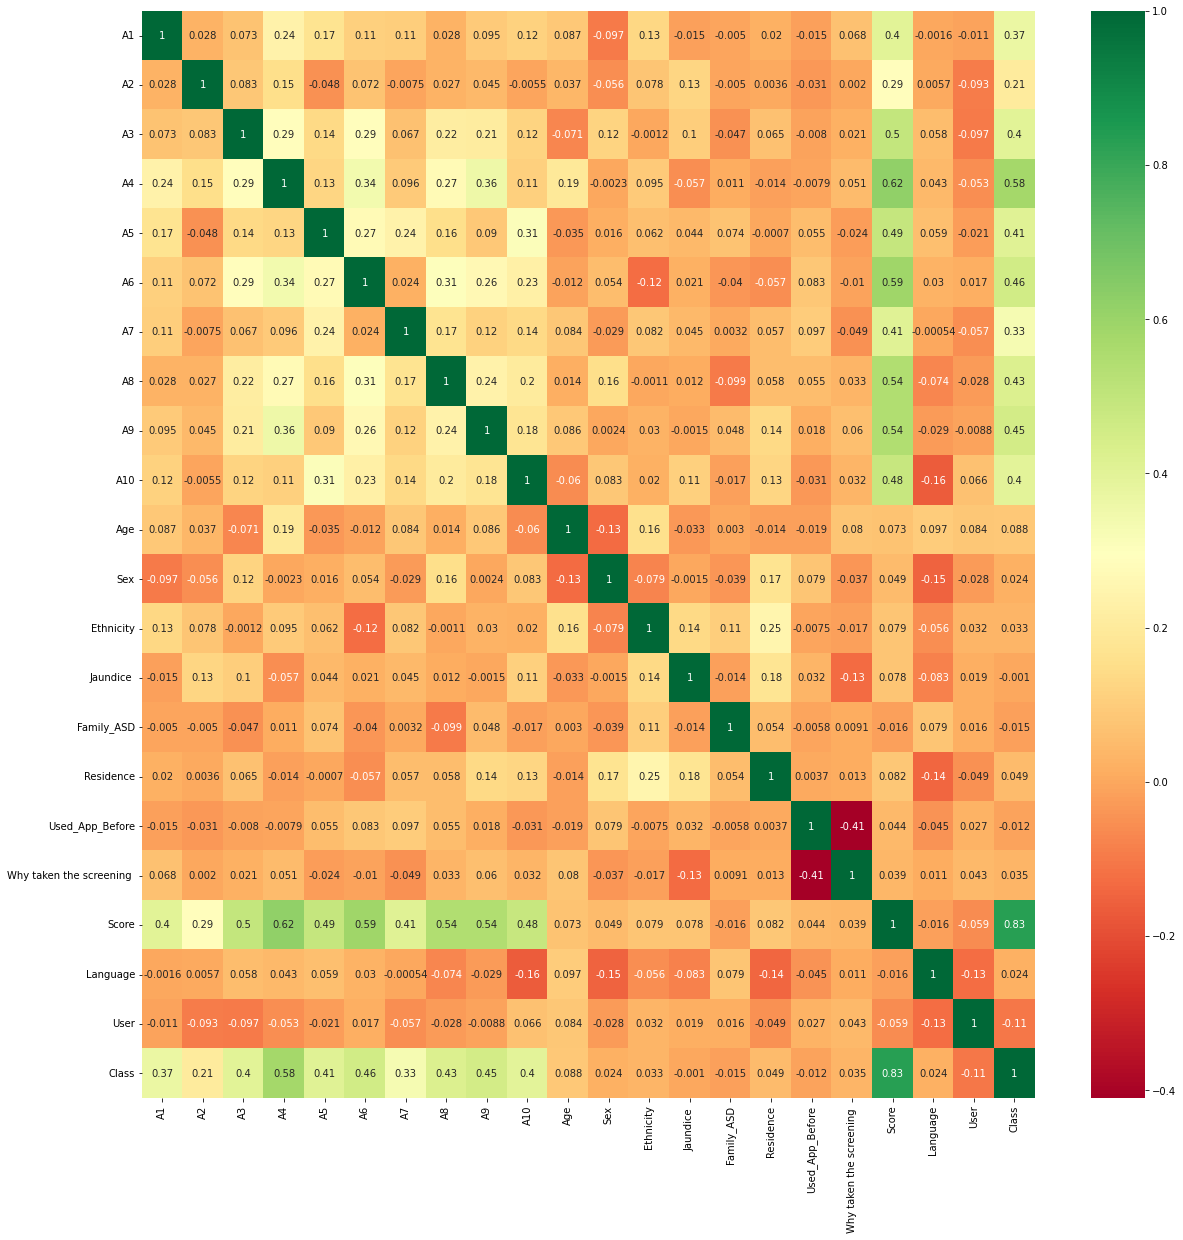

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Child 2018 Dataset: Model**

In [10]:
import time
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  LabelEncoder
import pandas as pd
import numpy as np
data = pd.read_csv('Child-Data2018.csv', na_values='?')
data.rename(columns={'Class': 'class'}, inplace=True)

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))

names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

X=data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7', 'A8', 'A9', 'A10']]
Y=data['class']

# Cross Validation

In [11]:
seed = 7
kfold = KFold(n_splits=10) # removed parameter "random state=seed" because it gave an error. Removing parameter did not affect output
for name, m in models:
    start_time = time.time()
    pred = cross_val_predict(m, X,Y, cv=kfold )
    elapsed_time = time.time() - start_time   
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    error = (FP + FN) / float(TP + TN + FP + FN) # equal #error_rate = 1 - accuracy
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')      

LR
0.1836
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.1213
95.8743
92.4603
99.2218
95.8411
96.0452
4.1257
CART
0.0939
93.7132
91.2698
96.1089
93.6894
93.9163
6.2868
NB
0.1028
89.3910
93.2540
85.6031
89.4285
89.0688
10.6090
KNN
0.2759
91.7485
89.2857
94.1634
91.7246
92.0152
8.2515
SVM
0.2603
98.6248
98.0159
99.2218
98.6188
98.6460
1.3752
AB
3.1746
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
2.1515
97.2495
95.6349
98.8327
97.2338
97.3180
2.7505
RF
2.8167
94.4990
92.8571
96.1089
94.4830
94.6360
5.5010
ET
1.2723
94.6955
93.2540
96.1089
94.6815
94.8177
5.3045


# Leave

In [12]:
num_folds = 10
for name, m in models: 
    loocv = LeaveOneOut() 
    start_time=time.time()
    pred = cross_val_predict(m, X,Y, cv=loocv )
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================') 

LR
9.7484
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
3.7502
96.0707
92.0635
100.0000
96.0317
96.2547
3.9293
CART
1.9996
93.7132
92.0635
95.3307
93.6971
93.8697
6.2868
NB
1.9451
91.5521
92.8571
90.2724
91.5648
91.5187
8.4479
KNN
2.6024
92.3379
89.6825
94.9416
92.3121
92.5996
7.6621
SVM
5.9136
99.2141
99.2063
99.2218
99.2141
99.2218
0.7859
AB
49.5687
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
42.8828
97.4460
97.2222
97.6654
97.4438
97.4757
2.5540
RF
81.1118
95.4813
94.8413
96.1089
95.4751
95.5513
4.5187
ET
63.5157
95.0884
93.2540
96.8872
95.0706
95.2199
4.9116


# Train Test Split

In [13]:
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
for name, m in models:
    model = m
    start_time = time.time()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y_test,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y_test, pred, average='binary')
    AUC=metrics.roc_auc_score(Y_test, pred)
    class_error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(class_error*100.0))
    print(' ============================')

LR
0.0097
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.0074
97.3856
94.9367
100.0000
97.4684
97.3684
2.6144
CART
0.0071
93.4641
92.4051
94.5946
93.4998
93.3333
6.5359
NB
0.0070
94.1176
98.7342
89.1892
93.9617
93.6170
5.8824
KNN
0.0098
89.5425
91.1392
87.8378
89.4885
89.0411
10.4575
SVM
0.0107
96.7320
98.7342
94.5946
96.6644
96.5517
3.2680
AB
0.0897
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
0.0825
96.7320
98.7342
94.5946
96.6644
96.5517
3.2680
RF
0.1616
94.1176
94.9367
93.2432
94.0900
93.8776
5.8824
ET
0.1471
95.4248
96.2025
94.5946
95.3986
95.2381
4.5752
